In [1]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
dataset = pd.read_csv('E:\\third\\NLP\\spam email dataset.csv')

In [3]:
print(f"Dataset head : \n{dataset.head()}\n")

Dataset head : 
                                                text spam
0  Subject: naturally irresistible your corporate...    1
1  Subject: the stock trading gunslinger  fanny i...    1
2  Subject: unbelievable new homes made easy  im ...    1
3  Subject: 4 color printing special  request add...    1
4  Subject: do not have money , get software cds ...    1



In [4]:
dataset.drop_duplicates(inplace=True)

In [5]:
dataset_ = dataset.dropna()
print(f"Number of missing data : \n{dataset_.isnull().sum()}\n")

Number of missing data : 
text    0
spam    0
dtype: int64



In [6]:
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean

In [7]:
dataset_['text']

0       Subject: naturally irresistible your corporate...
1       Subject: the stock trading gunslinger  fanny i...
2       Subject: unbelievable new homes made easy  im ...
3       Subject: 4 color printing special  request add...
4       Subject: do not have money , get software cds ...
                              ...                        
5727    Subject: re : research and development charges...
5728    Subject: re : receipts from visit  jim ,  than...
5729    Subject: re : enron case study update  wow ! a...
5730    Subject: re : interest  david ,  please , call...
5731    Subject: news : aurora 5 . 2 update  aurora ve...
Name: text, Length: 5694, dtype: object

In [8]:
print(f"Dataset head after cleaning punctuation and stopwords and then tokenizing it into words : \n{dataset_['text'].head().apply(process)}\n")

Dataset head after cleaning punctuation and stopwords and then tokenizing it into words : 
0    [Subject, naturally, irresistible, corporate, ...
1    [Subject, stock, trading, gunslinger, fanny, m...
2    [Subject, unbelievable, new, homes, made, easy...
3    [Subject, 4, color, printing, special, request...
4    [Subject, money, get, software, cds, software,...
Name: text, dtype: object



In [9]:
cv = CountVectorizer()
x_=dataset['text'].fillna(' ')
X = cv.fit_transform(x_).toarray()
y = dataset['spam'].fillna(' ')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [11]:
from sklearn.naive_bayes import GaussianNB
GN_classifier = GaussianNB()
GN_classifier.fit(X_train, y_train)

GaussianNB()

In [12]:
GN_score = GN_classifier.score(X_test,y_test)
GN_score

0.9692982456140351

In [13]:
y_GN_pred = GN_classifier.predict(X_test)
y_GN_pred

array(['0', '1', '1', ..., '1', '0', '0'], dtype='<U1')

In [14]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [21]:
print(f"Classification report :\n{classification_report(y_test, y_GN_pred)}\n")

Classification report :
                    precision    recall  f1-score   support

 mr suresh prabhu        0.00      0.00      0.00         1
                 0       0.97      1.00      0.98       873
                 1       0.98      0.89      0.93       266

          accuracy                           0.97      1140
         macro avg       0.65      0.63      0.64      1140
      weighted avg       0.97      0.97      0.97      1140




C:\Users\Sai Kumar P\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sai Kumar P\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sai Kumar P\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
GN_cm = confusion_matrix(y_test, y_GN_pred)
print(GN_cm)

[[  0   0   1]
 [  0 869   4]
 [  0  30 236]]


In [23]:
print(f"Model accuracy : {round(accuracy_score(y_test, y_GN_pred), 2)*100} %")
GN_acc=round(accuracy_score(y_test, y_GN_pred), 2)*100

Model accuracy : 97.0 %


In [58]:
from sklearn.metrics import f1_score
print('F1 Score: %.3f' % f1_score(y_test, y_GN_pred,average='micro'))
GN_F1=f1_score(y_test, y_GN_pred,average='micro')
GN_F1

F1 Score: 0.969


0.9692982456140351

In [28]:
from sklearn.naive_bayes import MultinomialNB
MN_classifier = MultinomialNB()
MN_classifier.fit(X_train, y_train)

MultinomialNB()

In [29]:
MN_score = MN_classifier.score(X_test,y_test)
MN_score

0.9833333333333333

In [30]:
y_MN_pred = MN_classifier.predict(X_test)

In [31]:
print(f"Classification report :\n{classification_report(y_test, y_MN_pred)}\n")

Classification report :
                    precision    recall  f1-score   support

                         0.00      0.00      0.00         0
 mr suresh prabhu        0.00      0.00      0.00         1
                 0       1.00      0.99      0.99       873
                 1       0.97      0.97      0.97       266

          accuracy                           0.98      1140
         macro avg       0.49      0.49      0.49      1140
      weighted avg       0.99      0.98      0.99      1140




C:\Users\Sai Kumar P\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sai Kumar P\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sai Kumar P\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sai Kumar P\anaconda3\lib\site-packa

In [32]:
MN_cm = confusion_matrix(y_test, y_MN_pred)
print(MN_cm)

[[  0   0   0   0]
 [  0   0   0   1]
 [  4   0 862   7]
 [  5   0   2 259]]


In [33]:
print(f"Model accuracy : {round(accuracy_score(y_test, y_MN_pred), 2)*100} %")
MN_acc=round(accuracy_score(y_test, y_MN_pred), 2)*100

Model accuracy : 98.0 %


In [34]:
MN_F1=f1_score(y_test, y_MN_pred,average='micro')
MN_F1

0.9833333333333333

In [35]:
from sklearn import svm

In [36]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [37]:
svm_score = classifier.score(X_test,y_test)
svm_score

0.9526315789473684

In [38]:
y_SVM_pred = classifier.predict(X_test)

In [39]:
print(f"Classification report :\n{classification_report(y_test, y_SVM_pred)}\n")

Classification report :
                    precision    recall  f1-score   support

 mr suresh prabhu        0.00      0.00      0.00         1
                 0       0.95      1.00      0.97       873
                 1       0.98      0.82      0.89       266

          accuracy                           0.95      1140
         macro avg       0.64      0.60      0.62      1140
      weighted avg       0.95      0.95      0.95      1140




C:\Users\Sai Kumar P\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sai Kumar P\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sai Kumar P\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
print(f"Model accuracy : {round(accuracy_score(y_test, y_SVM_pred), 2)*100} %")
SVM_acc=round(accuracy_score(y_test, y_SVM_pred), 2)*100

Model accuracy : 95.0 %


In [41]:
SVM_F1=f1_score(y_test, y_SVM_pred,average='micro')
SVM_F1

0.9526315789473683

In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


C:\Users\Sai Kumar P\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
LR_score = model.score(X_test,y_test)
LR_score

0.9868421052631579

In [44]:
y_LR_pred = model.predict(X_test)

In [45]:
print(f"Classification report :\n{classification_report(y_test, y_LR_pred)}\n")

Classification report :
                    precision    recall  f1-score   support

 mr suresh prabhu        0.00      0.00      0.00         1
                 0       0.99      0.99      0.99       873
                 1       0.98      0.97      0.97       266

          accuracy                           0.99      1140
         macro avg       0.66      0.65      0.66      1140
      weighted avg       0.99      0.99      0.99      1140




C:\Users\Sai Kumar P\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sai Kumar P\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sai Kumar P\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
print(f"Model accuracy : {round(accuracy_score(y_test, y_LR_pred), 2)*100} %")
LR_acc=round(accuracy_score(y_test, y_LR_pred), 2)*100

Model accuracy : 99.0 %


In [48]:
LR_F1=f1_score(y_test, y_LR_pred,average='micro')
LR_F1

0.9868421052631579

In [49]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [50]:
RF_score = clf.score(X_test,y_test)
RF_score

0.7657894736842106

In [51]:
y_RF_pred = clf.predict(X_test)

In [52]:
print(f"Classification report :\n{classification_report(y_test, y_RF_pred)}\n")

Classification report :
                    precision    recall  f1-score   support

 mr suresh prabhu        0.00      0.00      0.00         1
                 0       0.77      1.00      0.87       873
                 1       0.00      0.00      0.00       266

          accuracy                           0.77      1140
         macro avg       0.26      0.33      0.29      1140
      weighted avg       0.59      0.77      0.66      1140




C:\Users\Sai Kumar P\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sai Kumar P\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sai Kumar P\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
print(f"Model accuracy : {round(accuracy_score(y_test, y_RF_pred), 2)*100} %")
RF_acc=round(accuracy_score(y_test, y_RF_pred), 2)*100

Model accuracy : 77.0 %


In [54]:
RF_F1=f1_score(y_test, y_RF_pred,average='micro')
RF_F1

0.7657894736842106

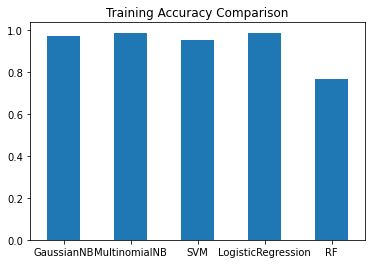

In [55]:
models = pd.DataFrame({"GaussianNB": GN_score,
                           "MultinomialNB": MN_score, "SVM":svm_score,"LogisticRegression":LR_score,"RF":RF_score
                           },
                          index=[0])
import matplotlib.pyplot as plt
models.T.plot.bar(title="Training Accuracy Comparison",
                      legend=False)
plt.xticks(rotation=0); 

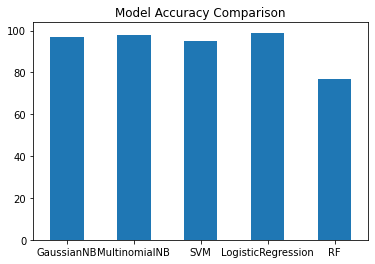

In [56]:
models = pd.DataFrame({"GaussianNB": GN_acc,
                           "MultinomialNB": MN_acc, "SVM":SVM_acc,"LogisticRegression":LR_acc,"RF":RF_acc
                           },
                          index=[0])
import matplotlib.pyplot as plt
models.T.plot.bar(title="Model Accuracy Comparison",
                      legend=False)
plt.xticks(rotation=0); 

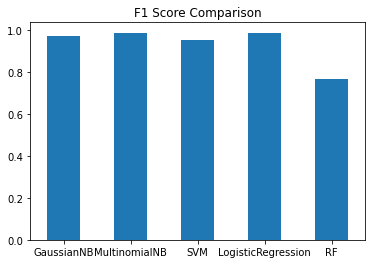

In [57]:
models = pd.DataFrame({"GaussianNB": GN_F1,
                           "MultinomialNB": MN_F1, "SVM":SVM_F1,"LogisticRegression":LR_F1,"RF":RF_F1
                           },
                          index=[0])
import matplotlib.pyplot as plt
models.T.plot.bar(title="F1 Score Comparison",
                      legend=False)
plt.xticks(rotation=0); 